In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
max_lunghezza_albero = 20
random_state = None ##davvero random 
# random_state = 5 ##un integer qualsiasi, prende sempre gli stessi numeri random ogni volta che lanci

In [3]:
df = pd.read_csv('/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/artabax/squat60.1.csv' , sep=';' , decimal='.')
df.set_index('Time', inplace=True)
df

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,Mag,UP,DOWN
Time,,,,,,,,,,,,
0,9.22379,3.05962,0.12397,0.51117,-2.25067,0.70190,992.16357,-18.34967,89.23000,0.98724,0,0
1,9.17947,2.79313,-0.25272,-0.95367,1.96075,5.27954,992.16168,-16.91789,88.42297,0.97367,0,0
2,8.44765,2.48770,-0.44915,-6.32476,11.17705,6.62231,992.16187,-16.38699,86.95651,0.94906,0,0
3,6.54864,1.69121,-0.10720,-0.95367,34.24833,3.13568,992.15485,-14.47858,89.06219,0.98415,0,0
4,5.08021,0.88573,0.85938,7.22503,32.60037,-7.54546,992.15295,-9.75418,80.39864,0.83562,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
586,7.48827,3.96152,3.63214,-5.59997,-9.02557,-1.50299,992.21906,-25.45410,64.12453,0.60595,0,1
587,6.51870,3.48722,3.90463,2.02942,-4.26483,-0.95367,992.15930,-24.65161,59.07883,0.53297,0,0
588,8.77344,4.69394,3.78306,-3.58581,-3.04413,1.60980,992.20844,-26.16444,66.67456,0.64462,0,0


## DecisionTree Classifier

Accuracy:   1.0
Precision:  0.0
Recall:     0.0


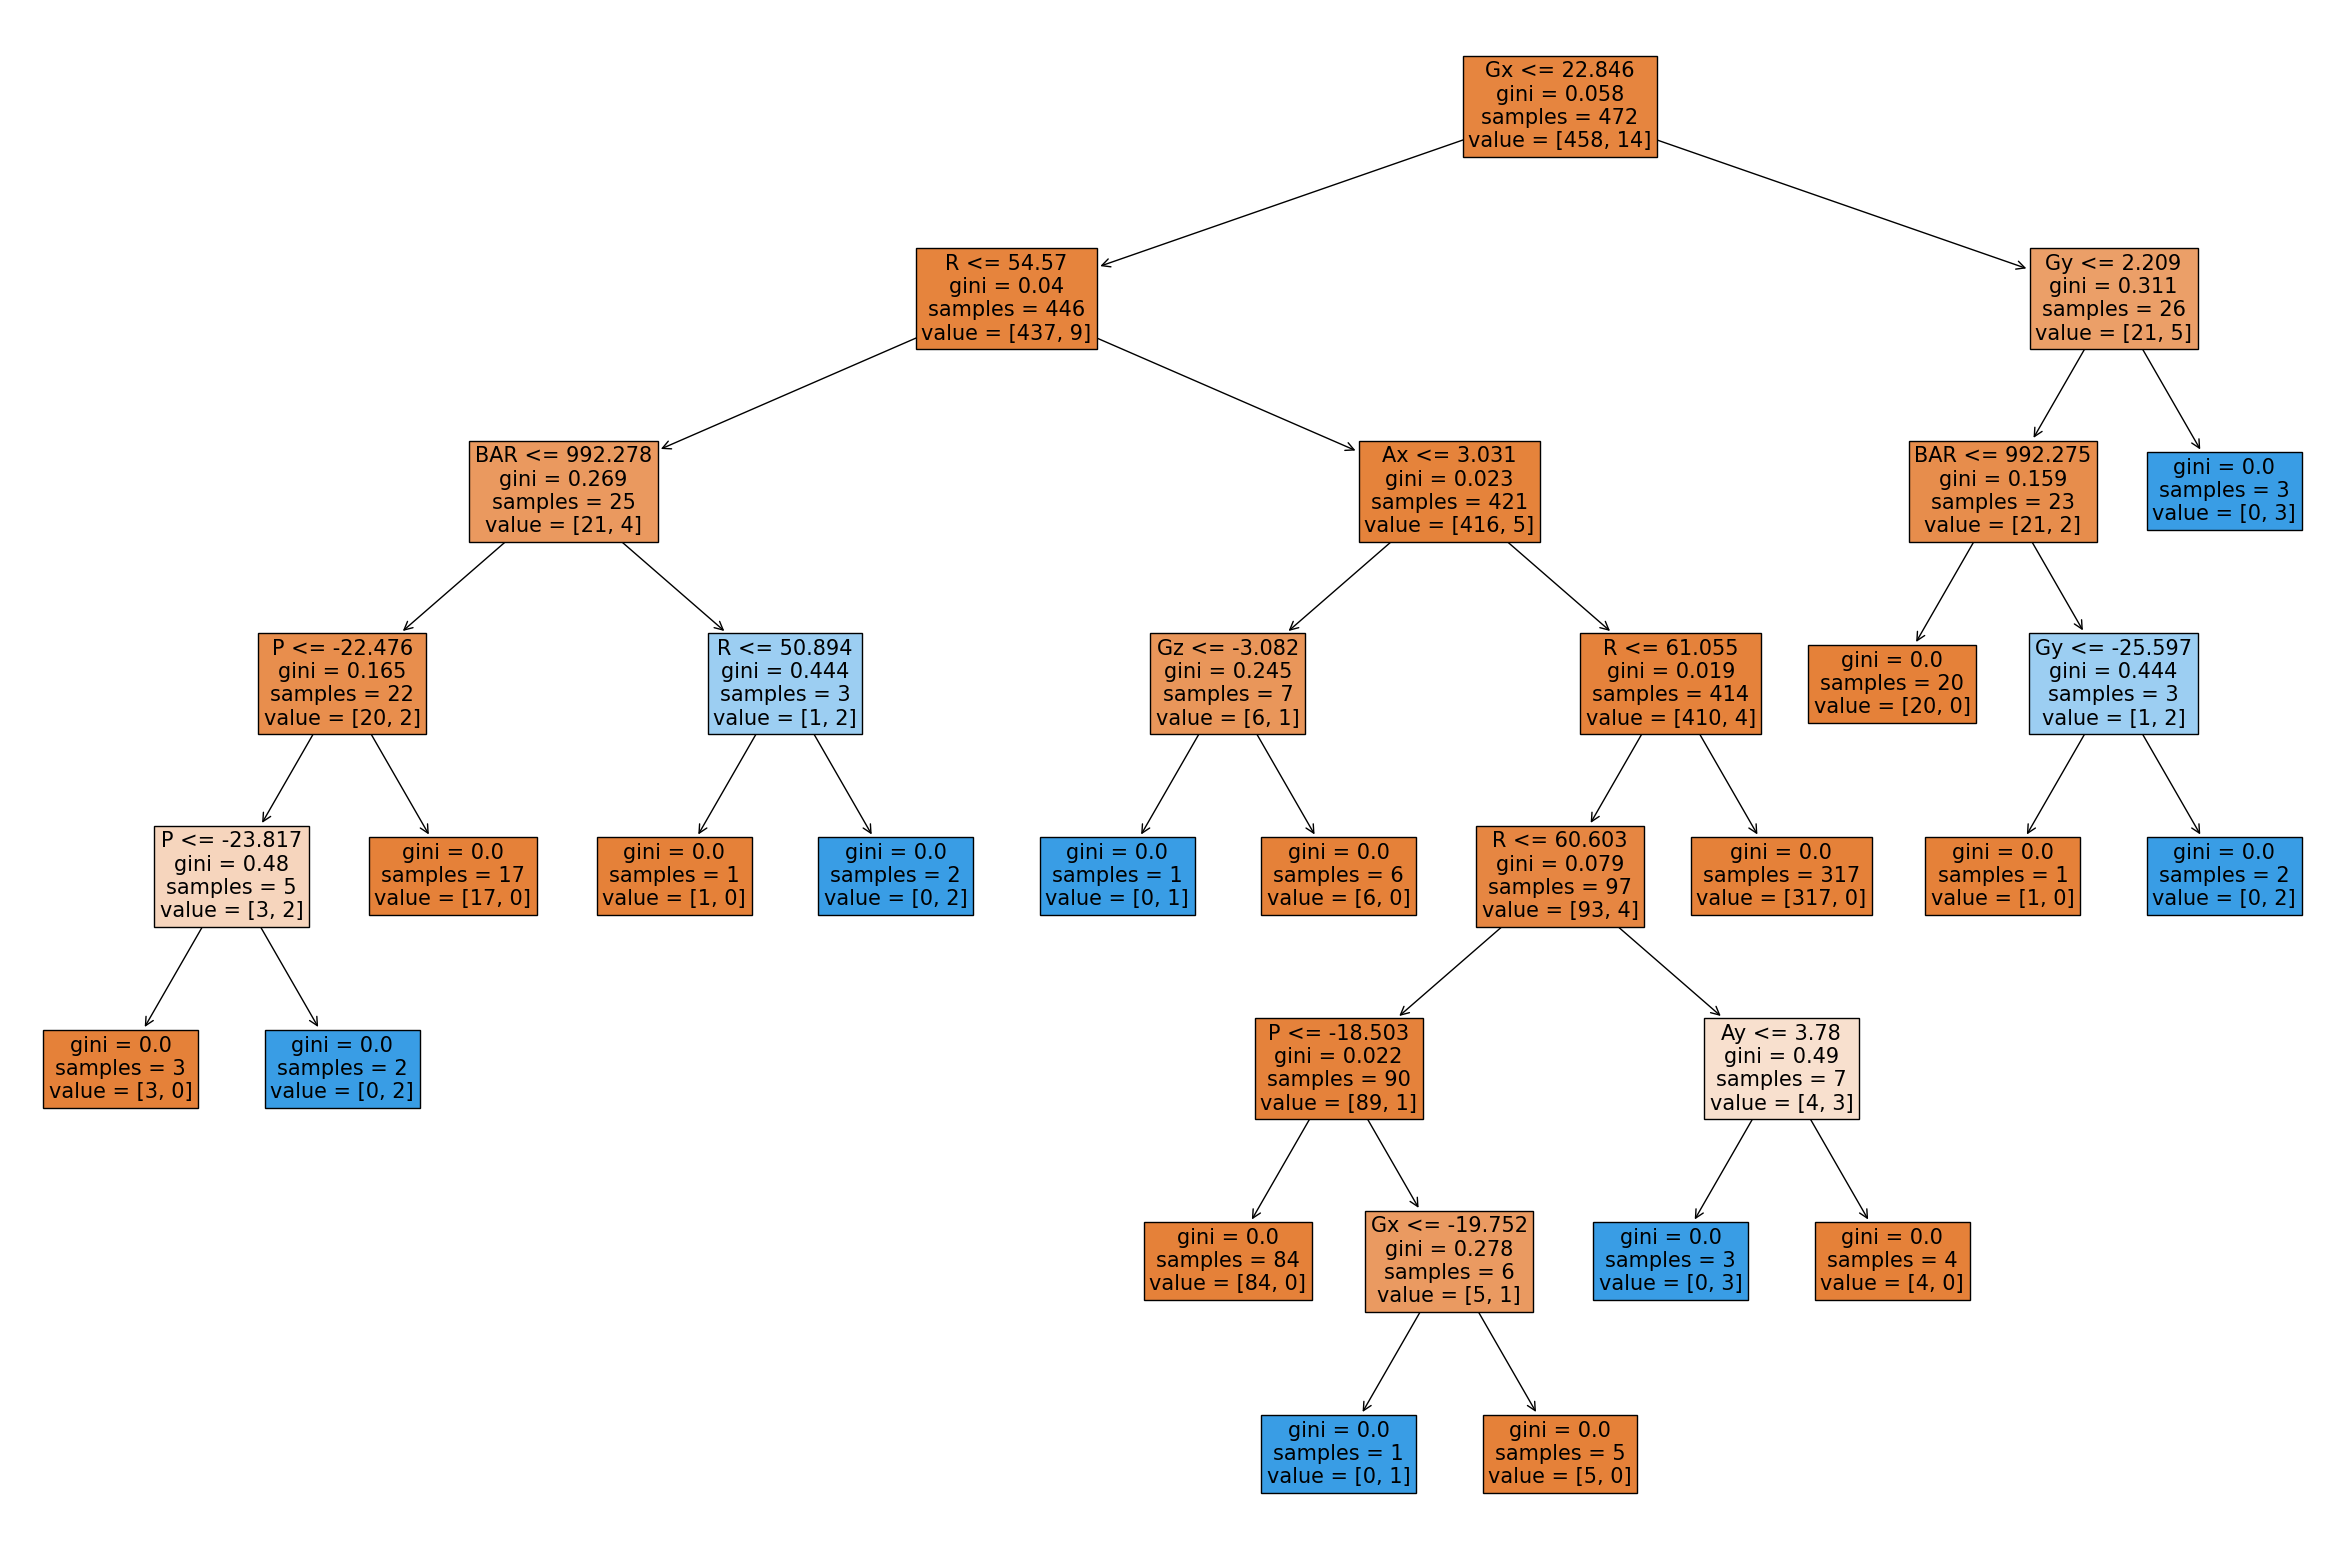

In [4]:
## Y è l'output che utilizziamo come training
## X sono le feautures, BISOGNA togliere la Y dalle colonne feautures 

y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','Mag'], axis=1, inplace=True)

##Divido il campione in Train e Test
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
# clf = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.005)
clf = DecisionTreeClassifier(max_depth=max_lunghezza_albero)
# clf = DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4)
clf = clf.fit(X_train, y_train)
param = clf.get_params()
predictions = clf.predict(X_test)
accuracy = clf.score(X_train, y_train)
precision = precision_score(y_true= y_test, y_pred=predictions)
recall = recall_score(y_true= y_test, y_pred=predictions)

print('Accuracy:  ', round(accuracy,3))
print('Precision: ', round(precision,3))
print('Recall:    ', round(recall,3))

from sklearn import tree
feature_names = X.columns
fig = plt.figure(figsize=(30,20))
_= tree.plot_tree(clf, 
        feature_names=feature_names, 
        filled=True, fontsize=15)


            0
Gy   0.211932
R    0.179806
BAR  0.149769
P    0.145291
Ay   0.126192
Gx   0.114925
Gz   0.063096
Ax   0.008990
Az   0.000000
UP   0.000000


<AxesSubplot:>

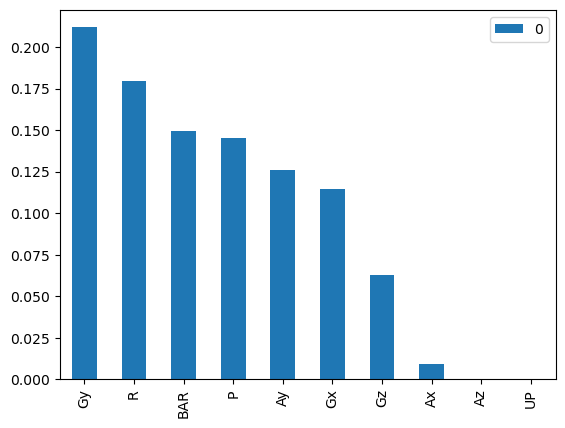

In [5]:
##importanza features
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)

print(feature_importance.head(10))
important_features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind='bar')

## DecisionTree Regreession

Accuracy:   1.0
Precision:  0.2
Recall:     0.143


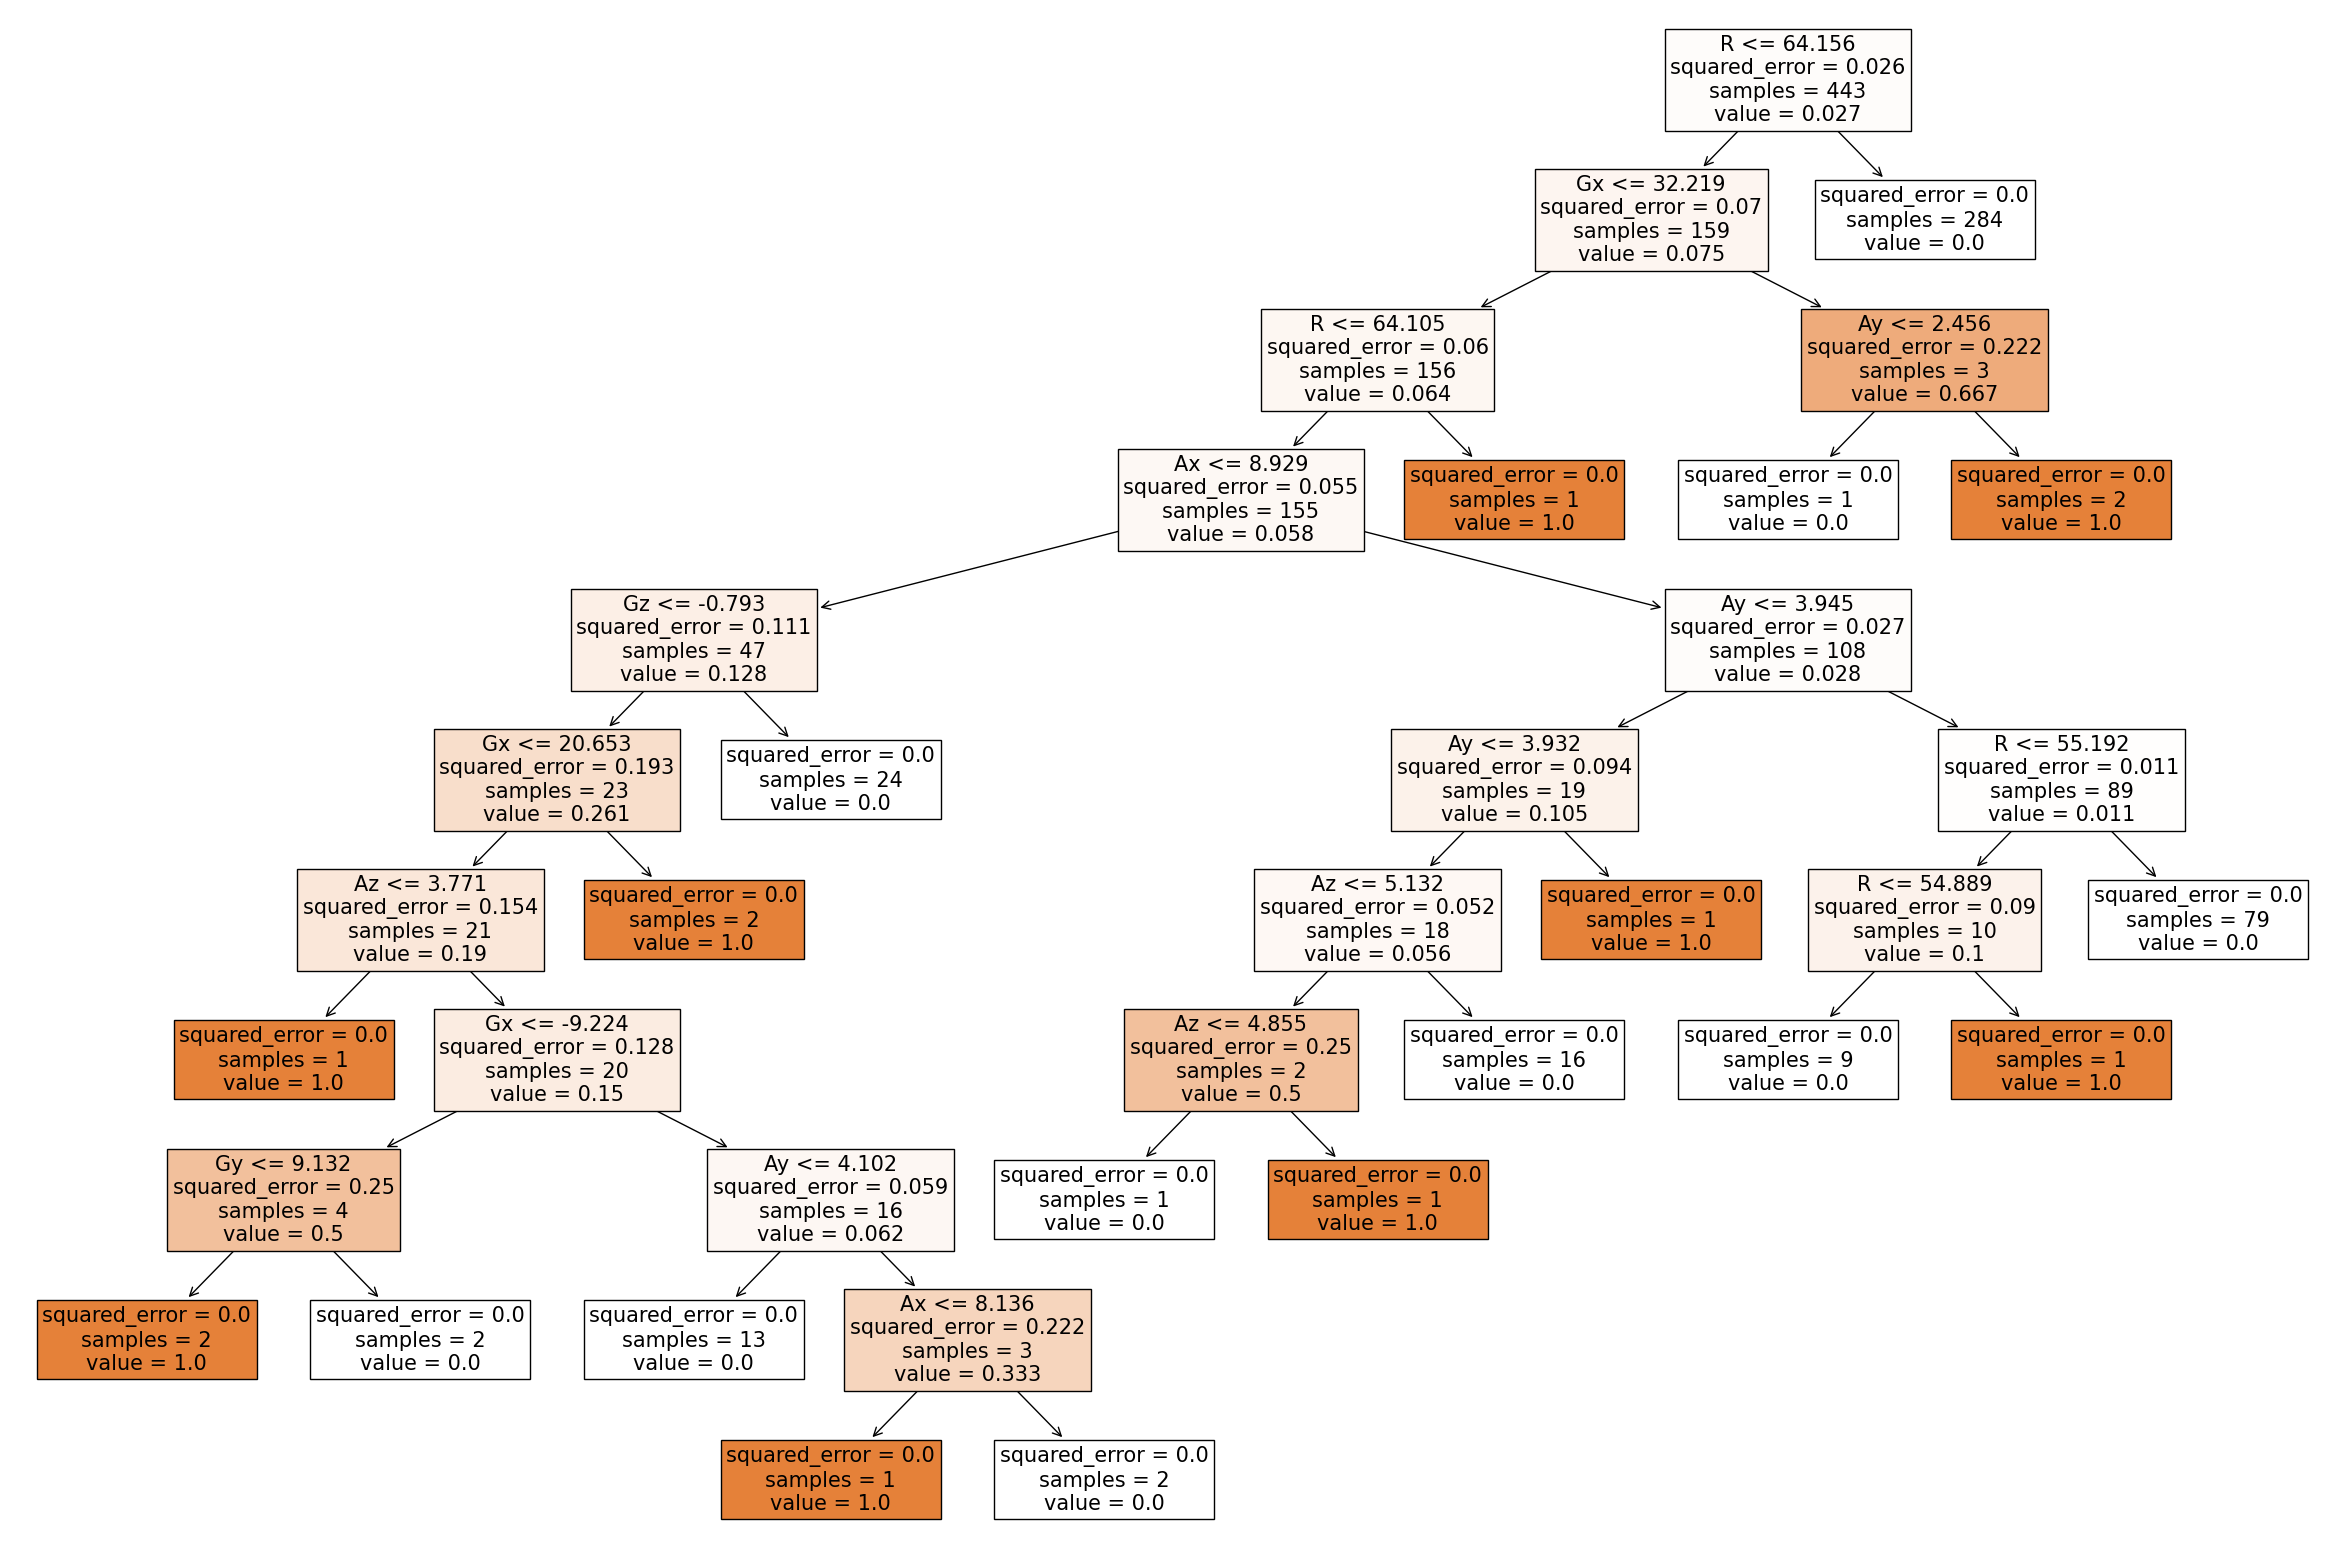

In [6]:
## Y è l'output che utilizziamo come training
## X sono le feautures, BISOGNA togliere la Y dalle colonne feautures 

y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','Mag'], axis=1, inplace=True)

##Divido il campione in Train e Test
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
clf = DecisionTreeRegressor()
# clf = DecisionTreeRegressor(ccp_alpha=0.01, max_depth=max_lunghezza_albero)
clf = clf.fit(X_train, y_train)
param = clf.get_params()
predictions = clf.predict(X_test)
accuracy = clf.score(X_train, y_train)
precision = precision_score(y_true= y_test, y_pred=predictions)
recall = recall_score(y_true= y_test, y_pred=predictions)

print('Accuracy:  ', round(accuracy,3))
print('Precision: ', round(precision,3))
print('Recall:    ', round(recall,3))

from sklearn import tree
feature_names = X.columns
fig = plt.figure(figsize=(30,20))
_= tree.plot_tree(clf, 
        feature_names=feature_names, 
        filled=True, fontsize=15)

            0
Gx   0.246501
R    0.209930
Ay   0.164537
Az   0.139833
Gy   0.085654
Ax   0.085086
Gz   0.068459
BAR  0.000000
P    0.000000
UP   0.000000


<AxesSubplot:>

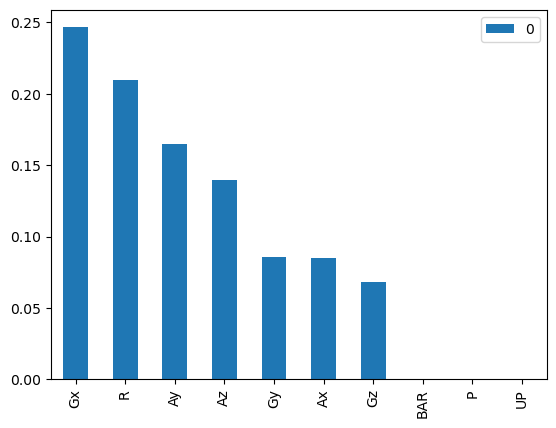

In [7]:
##importanza features
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)

print(feature_importance.head(10))
important_features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind='bar')

## Logistic Regression

In [8]:
log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=10000)
log_reg.fit(X_train, y_train)

# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

array([[-0.0916278 , -0.05033857, -0.02557031,  0.05608701,  0.02369086,
        -0.02289165,  0.00738019,  0.03076563, -0.14644743, -0.00095646]])

In [9]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report


LogReg Training Accuracy is:  0.9729119638826185
LogReg Testing Accuracy is:  0.9527027027027027


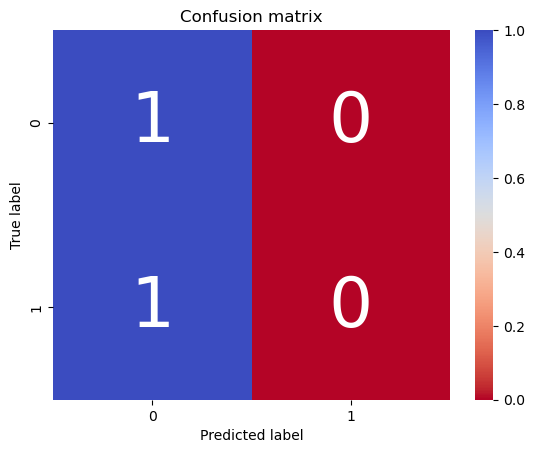

In [10]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [11]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)


##Total averages :
print("")
print("The average TPR is:", TPR.mean())

print("The average Precision is:", PPV.mean())
print("The average False positive rate is:", FPR.mean())
print("The average False Negative Rate is:", FNR.mean())

The True Positive Rate is: [1. 0.]
The Precision is: [0.97291196        nan]
The False positive rate is: [1. 0.]
The False Negative Rate is:  [0. 1.]

The average TPR is: 0.5
The average Precision is: nan
The average False positive rate is: 0.5
The average False Negative Rate is: 0.5


/var/folders/4q/qtwmq84s3_v04dtjldcfb9k80000gn/T/ipykernel_55831/2879462331.py:14: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP / (TP + FP)


### Regressione Lineare Multivariata

       Weight
Reg          
BAR   0.34703
UP  -0.006085
Az  -0.006022
Ax  -0.005054
R   -0.002578
Gx   0.001704
P    0.001532
Gz  -0.001445
Ay  -0.001128
Gy   0.000767
Termine noto: -344.00430526634267
 
MLR:  0.0531319233109101


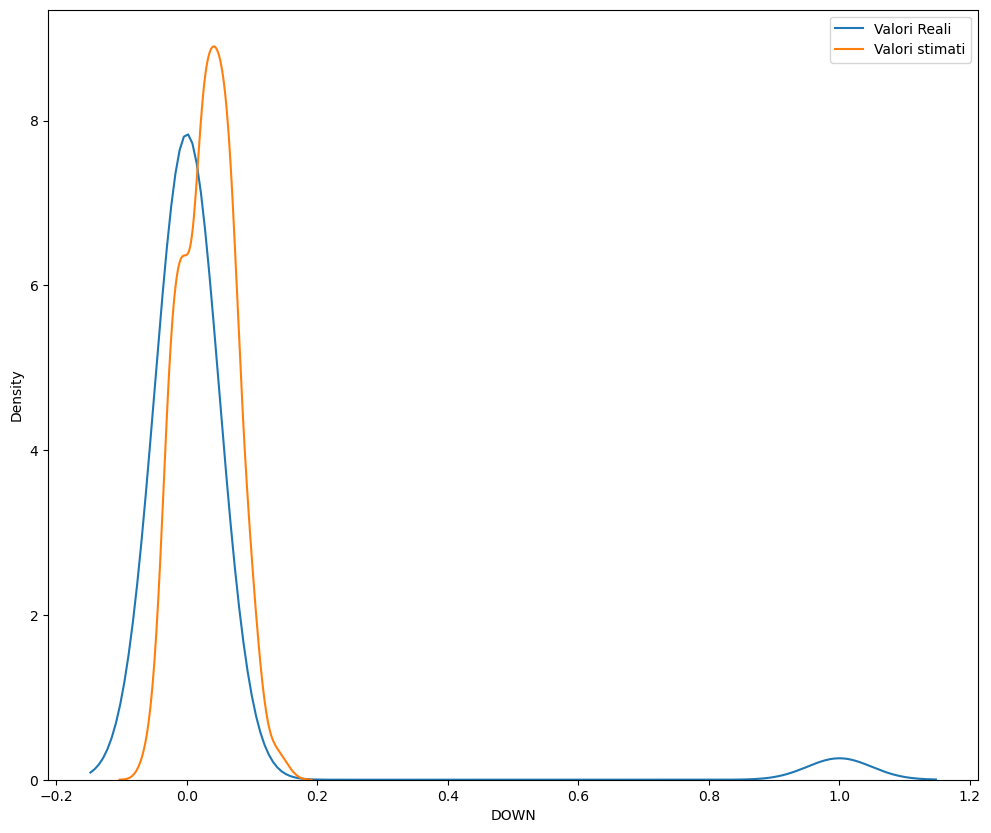

In [12]:
mlr = LinearRegression()
y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','Mag'], axis=1, inplace=True)

mlr.fit(X, y)
Y_hat = mlr.predict(X)
b0 = mlr.coef_
b1 = mlr.intercept_

reg = pd.DataFrame(data =[X.columns, b0]).T
reg.rename(columns={0:'Reg',1:'Weight'}, inplace=True)
reg.set_index('Reg', inplace=True)
reg.sort_values(by='Weight', key=abs, ascending=False , inplace=True)

print(reg)
print('Termine noto:',b1)
print(' ')
print('MLR: ', mlr.score(X, y))
plt.figure(figsize=(12, 10))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(Y_hat , label='Valori stimati')
plt.legend()
plt.show()
